Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **37 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [176]:
NAME = "Andriy Kashyrskyy"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Heaps and Heapsort


## Question 1 [time estimate: 10 minutes]

Given the array `H=[39, 85, 85, 16, 49, 7, 49, 92, 76, 15, 21, 30, 29, 31, 28]`, perform the following operations:
1. Draw the corresponding binary tree of H. Is the binary tree a valid max heap? Explain your answer.
2. Using as a model the drawing examples illustrated in Figure 6.2 of Cormen et al.,  draw a step-by-step transformation of the array above into a valid max heap. 
3. Now that you have obtained a valid max heap, write out the corresponding array that stores the valid max-heap.

Use as many cells as you wish for this question.

1. It is not valid as parent nodes are smaller than child nodes.

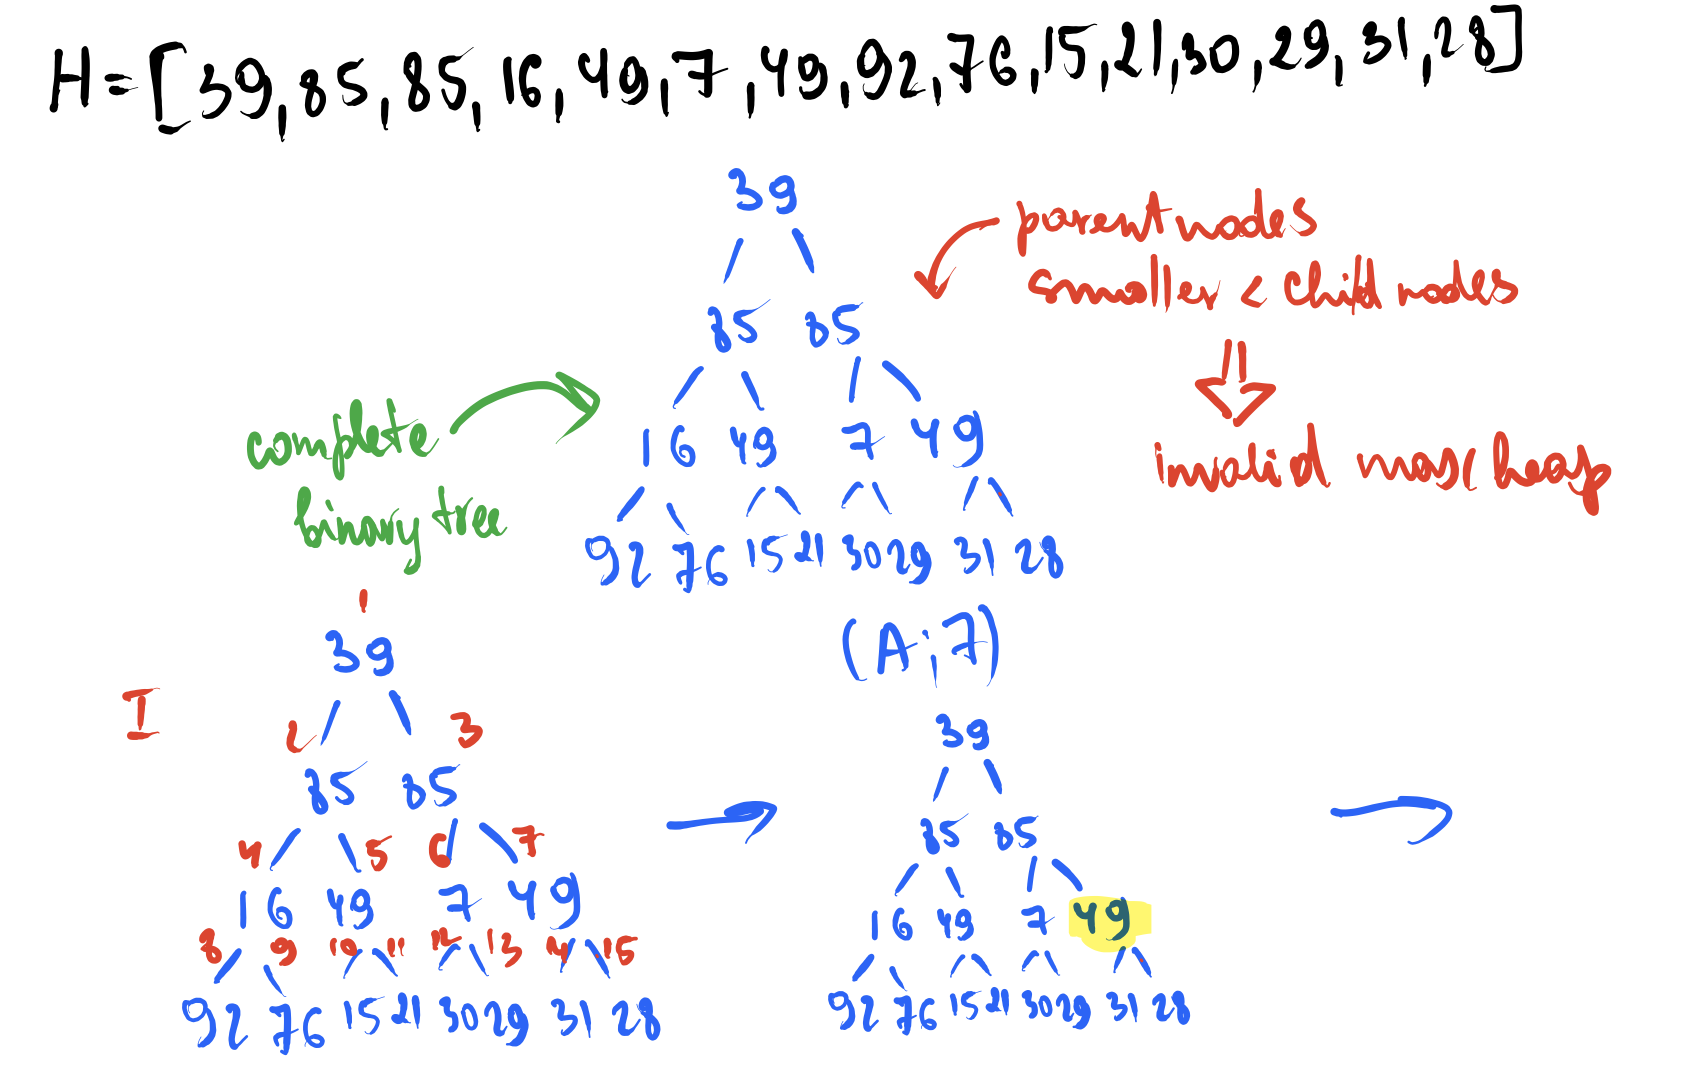

In [199]:
from IPython.display import Image
Image(filename="Screen1-4.1.png")

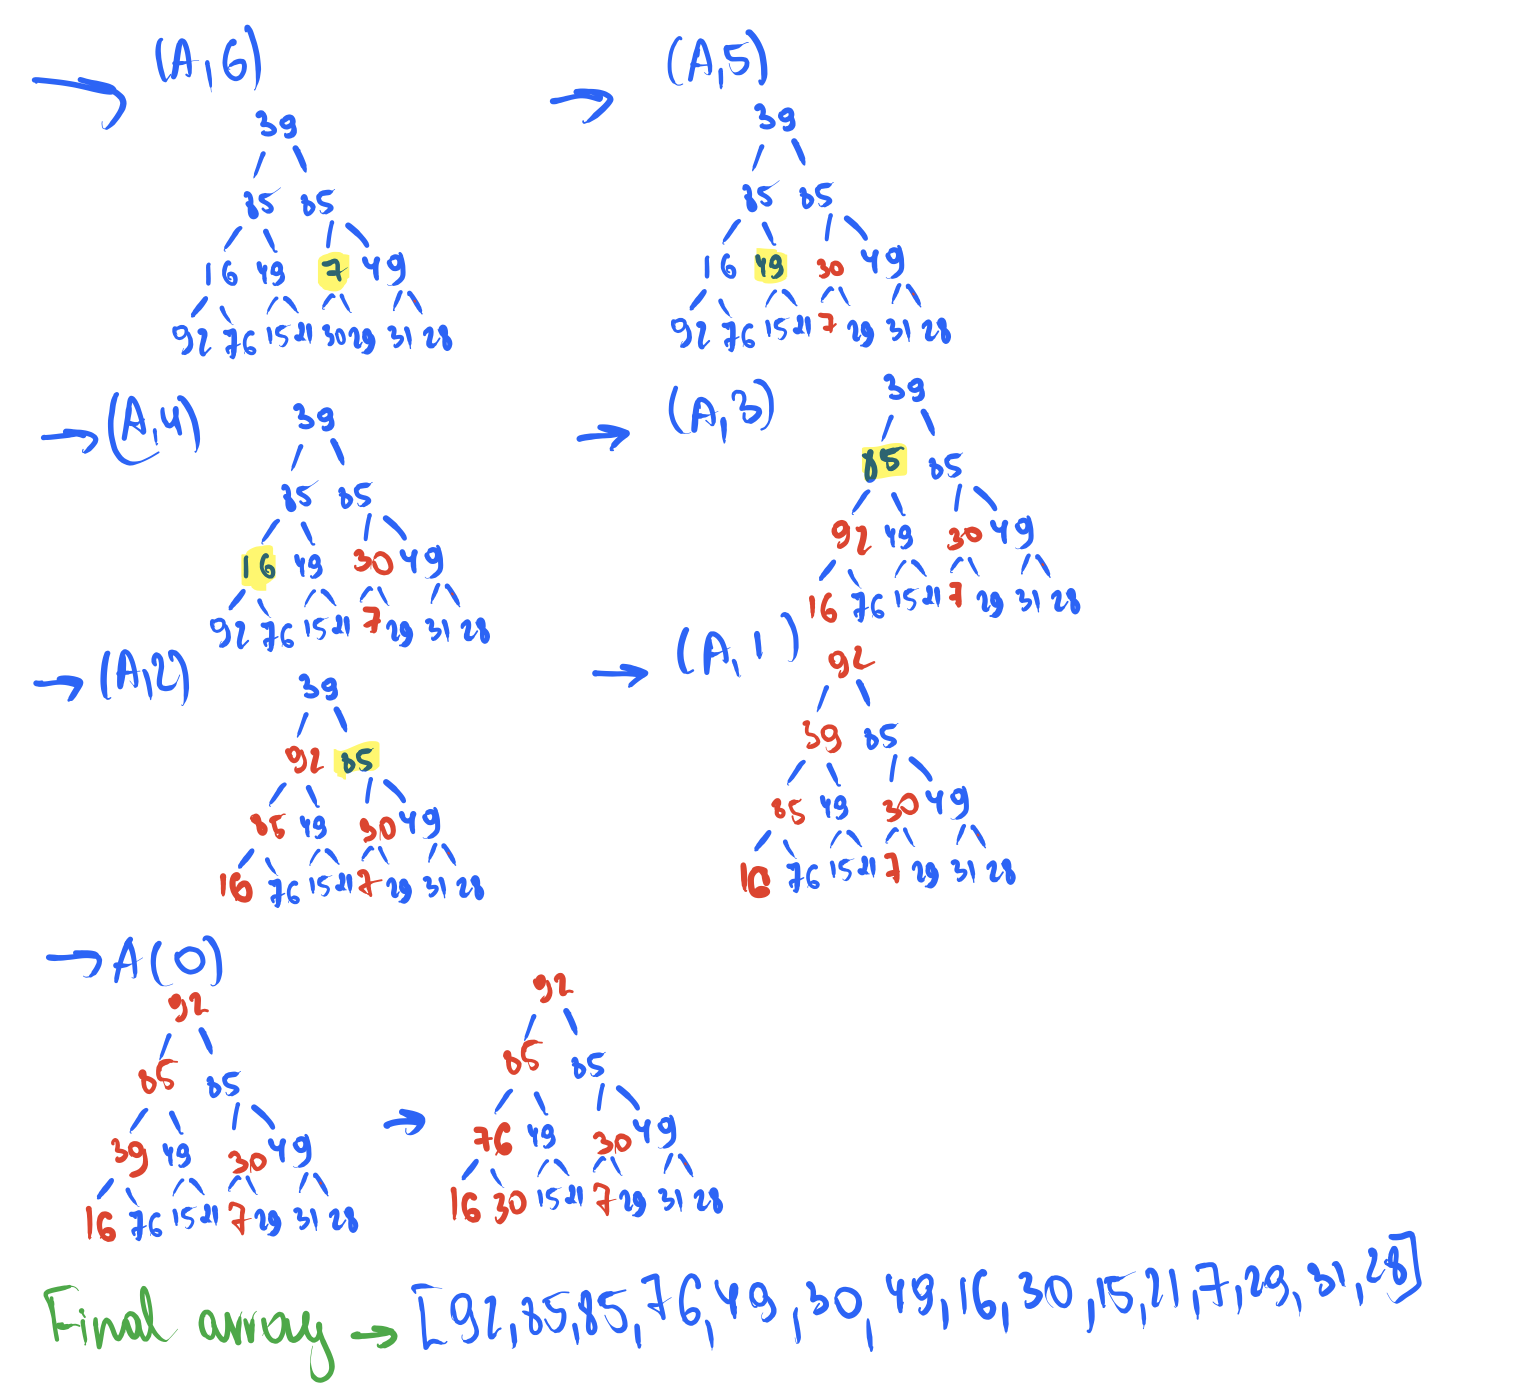

In [178]:
from IPython.display import Image
Image(filename="Screen12-4.1.png")

## Question 2. 

Consider the following questions on the $MAX-HEAPIFY$ operation.

### Question 2a [time estimate: 5 minutes]

In the pseudocode of $MAX-HEAPIFY$ (Cormen et al., p.154, or you can view it [here](https://drive.google.com/open?id=1e_3jsX4-qQCfZXKMok_T6LPFh9FwtmT5)), what does A.heap-size mean and what is the idea behind the local variable largest? 


A.heap-size means the size of an array A which has the heap; the idea behind local variable (largest) is to store (update, and store one) largest value which we get from max-heapify while we run the algorithm through all parent nodes.

### Question 2b [time estimate: 2 minutes]

The functions $LEFT(i)$ and $RIGHT(i)$, lines 1 and 2 in the $MAX-HEAPIFY$ pseudocode, return the array index of the left and right child, respectively, of a node in a binary tree. From reading Section 6.1, you know that the input to both functions is an integer number, $i$, which corresponds to the array index of the parent node in the array. Review Section 6.1 for more information. Write a Python implementation of the functions $LEFT(i)$ and $RIGHT(i)$ by filling in the cells below.

In [179]:
## the parent node would be calculated as (i-1)/2
def left(i):
    ## note that we start with an index of 0
    ## thus we want to not use 2*i, but 2*i + 1 instead
    return 2*i + 1

In [180]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

In [181]:
def right(i):
    ## note that we start with an index of 0
    ## thus we want to not use 2*i, but 2*i + 1 instead
    return 2*i + 2

In [182]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

### Question 2c [time estimate: 10 minutes]

Write a Python implementation of the MAX-HEAPIFY operation using the pseudocode above, and your newly written functions, `left` and `right`.

In [183]:
def heapify(heap, i):
    """
    Parameters
    ----------
    heap : list of floats
        Assume that the heap size is the length of the heap
        
    Note
    ----
    No output is needed. This function should modify (if necessary) 
    heap in-place.
    
    """
    ## heap size is the length of the heap
    l = left(i)
    r = right(i)
    if l <= len(heap) and heap[l] > heap[i]:
        largest = l
    else:
        largest = i
        
    if r <= len(heap) and heap[r] > heap[largest]:
        largest = r  

    if largest != i:
        heap[i], heap[largest] = heap[largest], heap[i] #swap
        heapify(heap, largest)

In [184]:
A = [39, 85, 85, 16, 49, 7, 49, 92, 76, 15, 21, 30, 29, 31, 28]
heapify(A,0)
A

[85, 49, 85, 16, 39, 7, 49, 92, 76, 15, 21, 30, 29, 31, 28]

In [185]:
A = [39, 85, 85, 16, 49, 7, 49, 92, 76, 15, 21, 30, 29, 31, 28]
heapify(A,0)
assert(A == [85, 49, 85, 16, 39, 7, 49, 92, 76, 15, 21, 30, 29, 31, 28])


## Question 3 [time estimate: 3 minutes] 

Next, write a Python implementation of the BUILD_MAX_HEAP operation using the pseudocode provided in Section 6.3 of Cormen et. al. Test your Python implementation using the array in problem 1, and make sure your Python codes produce a valid max heap.

In [194]:
## I could not figure where the mistake is. 
## The array does not change when using this function

def build_max_heap(A):
    """
    Parameters
    ----------
    A : a list of floats
    
    Note
    ----
    No output is needed. The function should turn A into 
    a valid max heap, in-place.
    
    """
    size = len(A)
    ##iterating from the end to beginning
    ## I also tried (len(A), -1, -1) but it did not work as well
    for i in range(size//2-1,0):
        heapify(A, i)

In [193]:
A = [4, 1, 3, 2, 16, 9, 10, 14, 8, 7]
build_max_heap(A)
assert(A == [16, 14, 10, 8, 7, 9, 3, 2, 4, 1])

AssertionError: 

## Question 4 [time estimate: 7 minutes]

Lastly, write Python implementations of the $MIN-HEAPIFY$ and $BUILD-MIN-HEAP$ operations for a min heap data structure. You can use your $MAX-HEAPIFY$ and $BUILD-MAX-HEAP$ Python function as models, just remember that the latter two functions support operations for the max heap data structure. Test your Python implementation of $BUILD-MIN-HEAP$ using the array in problem 1, and make sure your Python codes produce a valid min heap. 

In [195]:
def min_heapify(heap, i):
    """
    Parameters
    ----------
    heap : a list of floats
        Assume that the heap size is the length of the heap.
    
    Note
    ----
    No output is needed. This function should modify (if necessary) 
    heap in-place.
    
    """
    l = left(i)
    r = right(i)
    
    if l <= len(heap) and heap[l] < heap[i]:
        smallest = l
    else:
        smallest = i
        
    if r <= len(heap) and heap[r] < heap[smallest]:
        smallest = r  
    if smallest != i:
        heap[i], heap[smallest] = heap[smallest], heap[i] #swap
        heapify(heap, smallest)

In [197]:
A = [39, 85, 85, 16, 49, 7, 49, 92, 76, 15, 21, 30, 29, 31, 28]
min_heapify(A,0)

In [198]:
## Same here as with the code from task 3

def build_min_heap(A):
    """
    Parameters
    ----------
    A : a list of floats
    
    Note
    ----
    No output is needed. The function should turn A into 
    a valid min heap, in-place.
    
    """
    size = len(A)
    for i in range(size//2-1,0):
        min_heapify(A, i)

In [ ]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 